In [3]:
import pandas as pd

path="veriphix_vqa_sim_figure.csv"
df=pd.read_csv(path)
df

,Unnamed: 0,angle_shift,$N_s$,$d$,$t$,$p_{attack}$,grad_abs_err,Gradient Relative Error $e$,traps,$\hat{\alpha}$,$P_{\mathrm{trap}}$
0,21,0.087266,1000,4000,50,0.1,0.017092,0.111471,0.3,5°,0.006
1,22,0.087266,1000,4000,50,0.3,0.024488,0.155904,0.1,5°,0.002
2,23,0.087266,1000,4000,50,0.7,0.024587,0.160586,0.5,5°,0.010
3,45,0.523599,1000,4000,50,0.1,0.040195,0.279191,2.4,30°,0.048
4,46,0.523599,1000,4000,50,0.3,0.100798,0.706332,6.0,30°,0.120
5,47,0.523599,1000,4000,50,0.7,0.222138,1.551389,13.7,30°,0.274
6,69,1.570796,1000,4000,50,0.1,0.043891,0.302055,1.3,90°,0.026
7,70,1.570796,1000,4000,50,0.3,0.094910,0.653132,4.5,90°,0.090
8,71,1.570796,1000,4000,50,0.7,0.214318,1.474547,10.1,90°,0.202


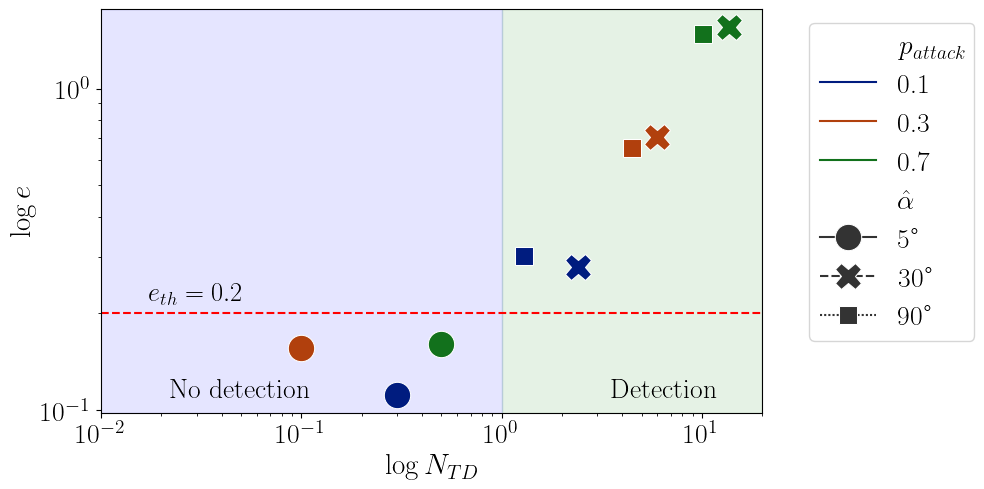

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],  # Optional: LaTeX default font
}) 


eth = 0.2
fontsize = 20

# Create single plot
fig, ax = plt.subplots(figsize=(10, 5))

custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Blue, Orange, Green

sns.lineplot(
    data=df,
    x="traps",
    y=r"Gradient Relative Error $e$",
    hue=r"$p_{attack}$",
    style=r"$\hat{\alpha}$",
    markers=True,
    ax=ax,
    palette="dark"  # or "deep", "muted", "dark", "colorblind", etc.

)

# Annotate and customize
ax.axhline(y=eth, linestyle='--', color='red')
ax.axvspan(0, 1, color='blue', alpha=0.1)
ax.axvspan(1, 20, color='green', alpha=0.1)
ax.text(.05, .11, 'No detection', ha='center', color='black', fontsize=fontsize)
ax.text(6.5, .11, 'Detection', ha='center', color='black', fontsize=fontsize)
ax.text(.03, eth + .02, r'$e_{th}=' + str(eth) + '$', ha='center', color='black', fontsize=fontsize - 1)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e-2, 2e1)
ax.set_xlabel(r"$\log N_{TD}$", fontsize=fontsize+1)
ax.set_ylabel(r"$\log e$", fontsize=fontsize+1)

ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)

for line in ax.lines:
    line.set_markersize(fontsize - 1)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=fontsize, markerscale=1)

plt.tight_layout()
plt.savefig("step_level_2q_only_second.pdf", format="pdf", bbox_inches="tight")
plt.show()
